Austin Flippo

Data Science Jobs EDA (dataset from Kaggle)

In [13]:
import pandasql
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
#reusable function for running queries
run_query = lambda query: sqldf(query, globals())

In [157]:
#dataset of Data Science Jobs From Indeed from Kaggle
df = pd.read_csv('Indeed-Data Science Jobs List.csv')
print(df.columns.values)

['Position' 'Job Title' 'Company' 'Location' 'Salary' 'Short Description'
 'Posted At' 'Job link']


In [16]:
query_1 = 'SELECT * FROM df'

In [17]:
#most common job title
most_common_query = """
            SELECT `Job Title`, COUNT(*) as count 
            FROM df 
            GROUP BY `Job Title` HAVING count > 1 
            ORDER BY count 
            DESC LIMIT 5
    """
run_query(most_common_query)

,Job Title,count
0,Data Scientist,55
1,Senior Data Scientist,20
2,Sr. Data Scientist,6
3,Sr Data Scientist,4
4,Data Scientist II,4


In [159]:
#turn salary string into integer
#purpose: in order to make calculations with salaries, they must be converted to numbers
def salary_to_int(sal):
    l_sal = "".join(c for c in sal if c.isdecimal() or c == ' ').split(' ')
    l_sal = list(map(int, filter(None, l_sal)))

    #if given a range, return the mean 
    if len(l_sal) > 1:
        return round((l_sal[0] +l_sal[-1])/2)
    else:
        return l_sal[0]

In [108]:
#dataframe with salaries as integers
sal_query = """
            SELECT `Job Title`, Company, salary 
            FROM df 
            WHERE Salary IS NOT NULL
            """
#create place holder dataframe called t_df, to not edit df
t_df = run_query(sal_query)
t_df['Salary'] = t_df['Salary'].apply(lambda sal: salary_to_int(sal))
t_df

,Job Title,Company,Salary
0,Data Scientist,Robert Half,130000
1,Data Scientist,US Office of Personnel Management,135372
2,Data Scientist,Long Beach City College,126133
3,Systems Engineer,Patelco Credit Union,117882
4,Data Scientist,Cognizant,115000
5,Sr. Data Scientist,Alight,106050
6,Data Scientist,eBay,145675
7,"Executive, Data Scientist",USAA,303450
8,"Data Scientist II (Northridge, CA or MN)",Medtronic,138000
9,Senior Data Scientist,Protellhirestaffingsolution.com,150000


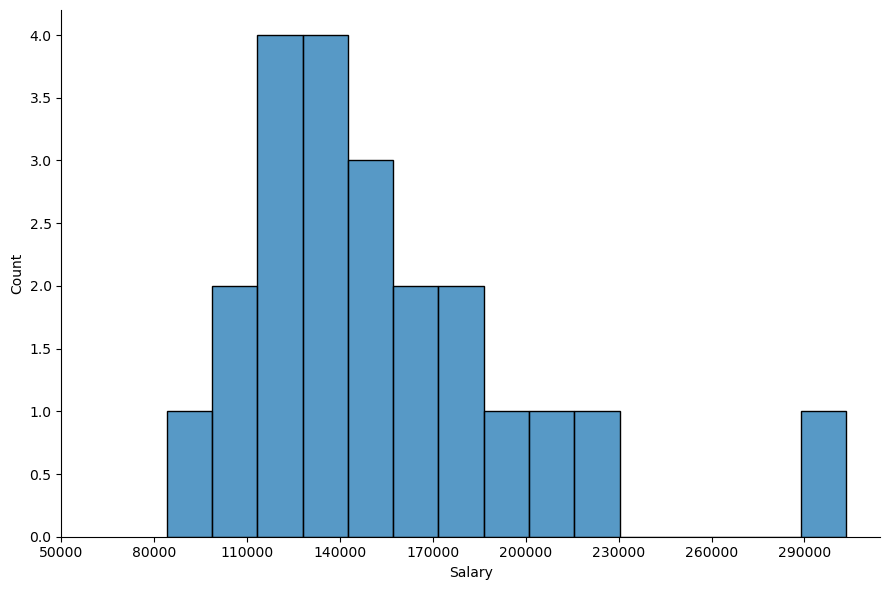

In [109]:
#distribution of salaries
dist = sns.displot(data=t_df, x = 'Salary', bins = 15, height = 6, aspect = 1.5)
plt.xticks(ticks=range(50000,300001,30000));


In [149]:
#summary statistics
avg_sal_query = """
            SELECT ROUND(AVG(salary),2) as `Average Salary`
            FROM t_df
            """
q = run_query(avg_sal_query).values
print('Avg Salary is $' + str(q[0][0])) 

sal_median = t_df['Salary'].median()
sal_std = t_df['Salary'].std()

print('Salary Median is $' + str(sal_median))
print('Salary Standard Deviation is $' + str(round(sal_std,2)))

Avg Salary is $152679.55
Salary Median is $141837.5
Salary Standard Deviation is $47381.89


Average Salary in Data Science Field: $152,679.55

68% of jobs lie within $105,297.64 - 200,061.46

90% of jobs lie within $57,915.73 - 247,443.37


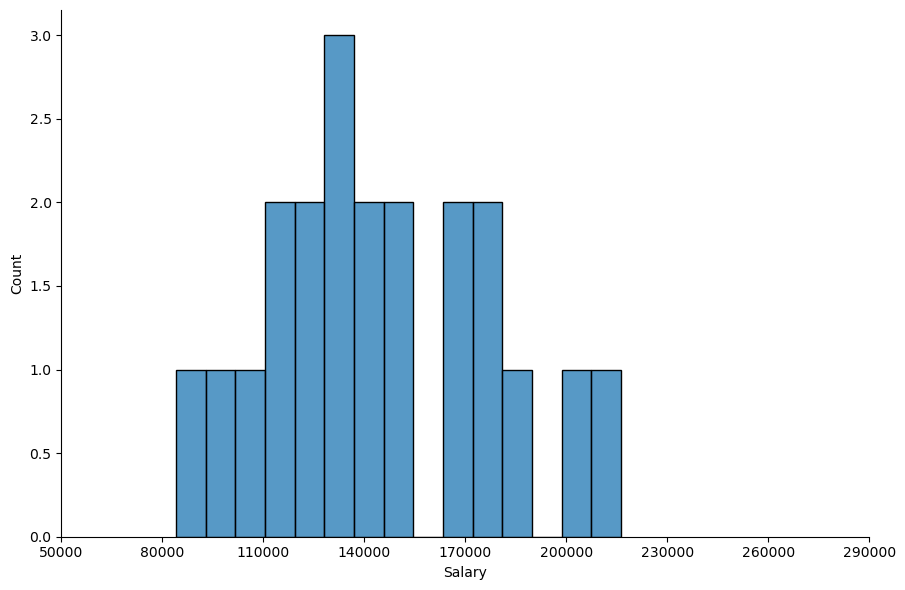

In [120]:
#distrubtion with outliers removed 
no_outliers_df = t_df[(t_df['Salary'] <= 290000) & (t_df['Salary']>80000)]
dist = sns.displot(data=no_outliers_df, x = 'Salary', bins = 15, height = 6, aspect = 1.5)
plt.xticks(ticks=range(50000,300001,30000));


In [148]:
#summary statistics with outliers removed
avg_sal_query = """
            SELECT ROUND(AVG(salary),2) as `Average Salary`
            FROM no_outliers_df
            """
q = run_query(avg_sal_query).values
print('Average Salary is $' + str(q[0][0]))

sal_median = no_outliers_df['Salary'].median()
sal_std = no_outliers_df['Salary'].std()

print('Salary Median is $' + str(sal_median))
print('Salary Standard Deviation is $' + str(round(sal_std,2)))


Average Salary is $145500.0
Salary Median is $138000.0
Salary Standard Deviation is $34155.33


Excluding outlier salary of $303,450...

68% of jobs lie within $111,344.67 - 179,655.33

90% of jobs lie within $77,189.34 - 213,810.66


In [21]:
#10 highest paying jobs
top_salaries_query = """
            SELECT `Job Title`, Company, salary
            FROM t_df
            ORDER BY salary DESC
            LIMIT 10
            """
run_query(top_salaries_query)

,Job Title,Company,Salary
0,"Executive, Data Scientist",USAA,303450.0
1,Data Scientist (All Levels),Noblis,217362.5
2,"Data Scientist, Data Strategy and Analytics",Abbott Laboratories,216200.0
3,"Senior Data Scientist, Lodging Pricing",Hopper,205000.0
4,Staff Data Scientist,Adobe,203900.0
5,Data Scientist - Marketing Mix Models,Verizon,196000.0
6,"Senior Data Scientist, Generative AI",Scale AI,189000.0
7,Data Scientist - Full Scope Poly,Momentum,180000.0
8,Senior Data Scientist,Autodesk,178000.0
9,Data Scientist,Peraton,175500.0


In [26]:
#Top 10 companies with highest paying jobs on average, and their number of jobs

top_3_query = """
            SELECT Company, AVG(Salary) as `Average Salary`, COUNT(*) as `Job Count`
            FROM t_df
            GROUP BY Company 
            ORDER BY 2 DESC
            LIMIT 10
            """
run_query(top_3_query)

,Company,Average Salary,Job Count
0,USAA,303450.0,1
1,Noblis,217362.5,1
2,Abbott Laboratories,216200.0,1
3,Hopper,205000.0,1
4,Verizon,196000.0,1
5,Scale AI,189000.0,1
6,Momentum,180000.0,1
7,Autodesk,178000.0,1
8,Adobe,177000.0,2
9,Peraton,175500.0,1


In [23]:
#function that returns location if the location is near me, or remote
#purpose: to grab the jobs close to home
def search_location(loc):
    keywords = [' 90', 'Los Angeles', 'LA', 'Remote', ' CA', 'California']
    for k in keywords:
            if type(loc) == str:
                if k in loc:
                    return loc

In [161]:
#search for jobs in California, or remote
l_df = df
l_df['Location'] = df['Location'].apply(lambda loc: search_location(loc))
l_df.dropna(subset=['Location'],inplace=True)

near_jobs_query = """
            SELECT `Job Title`, Salary, Location, `Job Link`
            FROM l_df
             
            
            """

run_query(near_jobs_query)

,Job Title,Salary,Location,Job link
0,Data Scientist,"$120,000 - $140,000 a year","Remote in Los Angeles, CA 90024",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,Data Scientist,"$103,409 - $167,336 a year",Remote,https://www.indeed.com/rc/clk?jk=d393197b7bc42...
2,Data Scientist,None,Remote in Colorado,https://www.indeed.com/rc/clk?jk=258a205f5e303...
3,Data Scientist,"$106,779 - $145,487 a year","Long Beach, CA 90808 \n(Lakewood Village area)",https://www.indeed.com/rc/clk?jk=d8685d06c8699...
4,Systems Engineer,"$115,764 - $120,000 a year","Dublin, CA 94568",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
5,Data Scientist I,None,"Hybrid work in Campbell, CA 95008",https://www.indeed.com/rc/clk?jk=795023c034e63...
6,Clinical Data Scientist,None,Remote,https://www.indeed.com/rc/clk?jk=e45e0ec028e3d...
7,Data Scientist,"$80,000 - $150,000 a year",Remote in Missouri,https://www.indeed.com/rc/clk?jk=7f6039ca6056e...
8,Associate Data Scientist,None,"Remote in Portland, OR",https://www.indeed.com/rc/clk?jk=0ac4e7a84594b...
9,"Associate Data Scientist, RWE Clinical Trials ...",None,"Remote in Deerfield, IL 60015",https://www.indeed.com/rc/clk?jk=0535c1945f4f3...
